# Setup

In [13]:
import sys
import os
from pathlib import Path
from collections import defaultdict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(str(Path(os.getcwd()).parent))
from mcda.dataset import MCDADataset

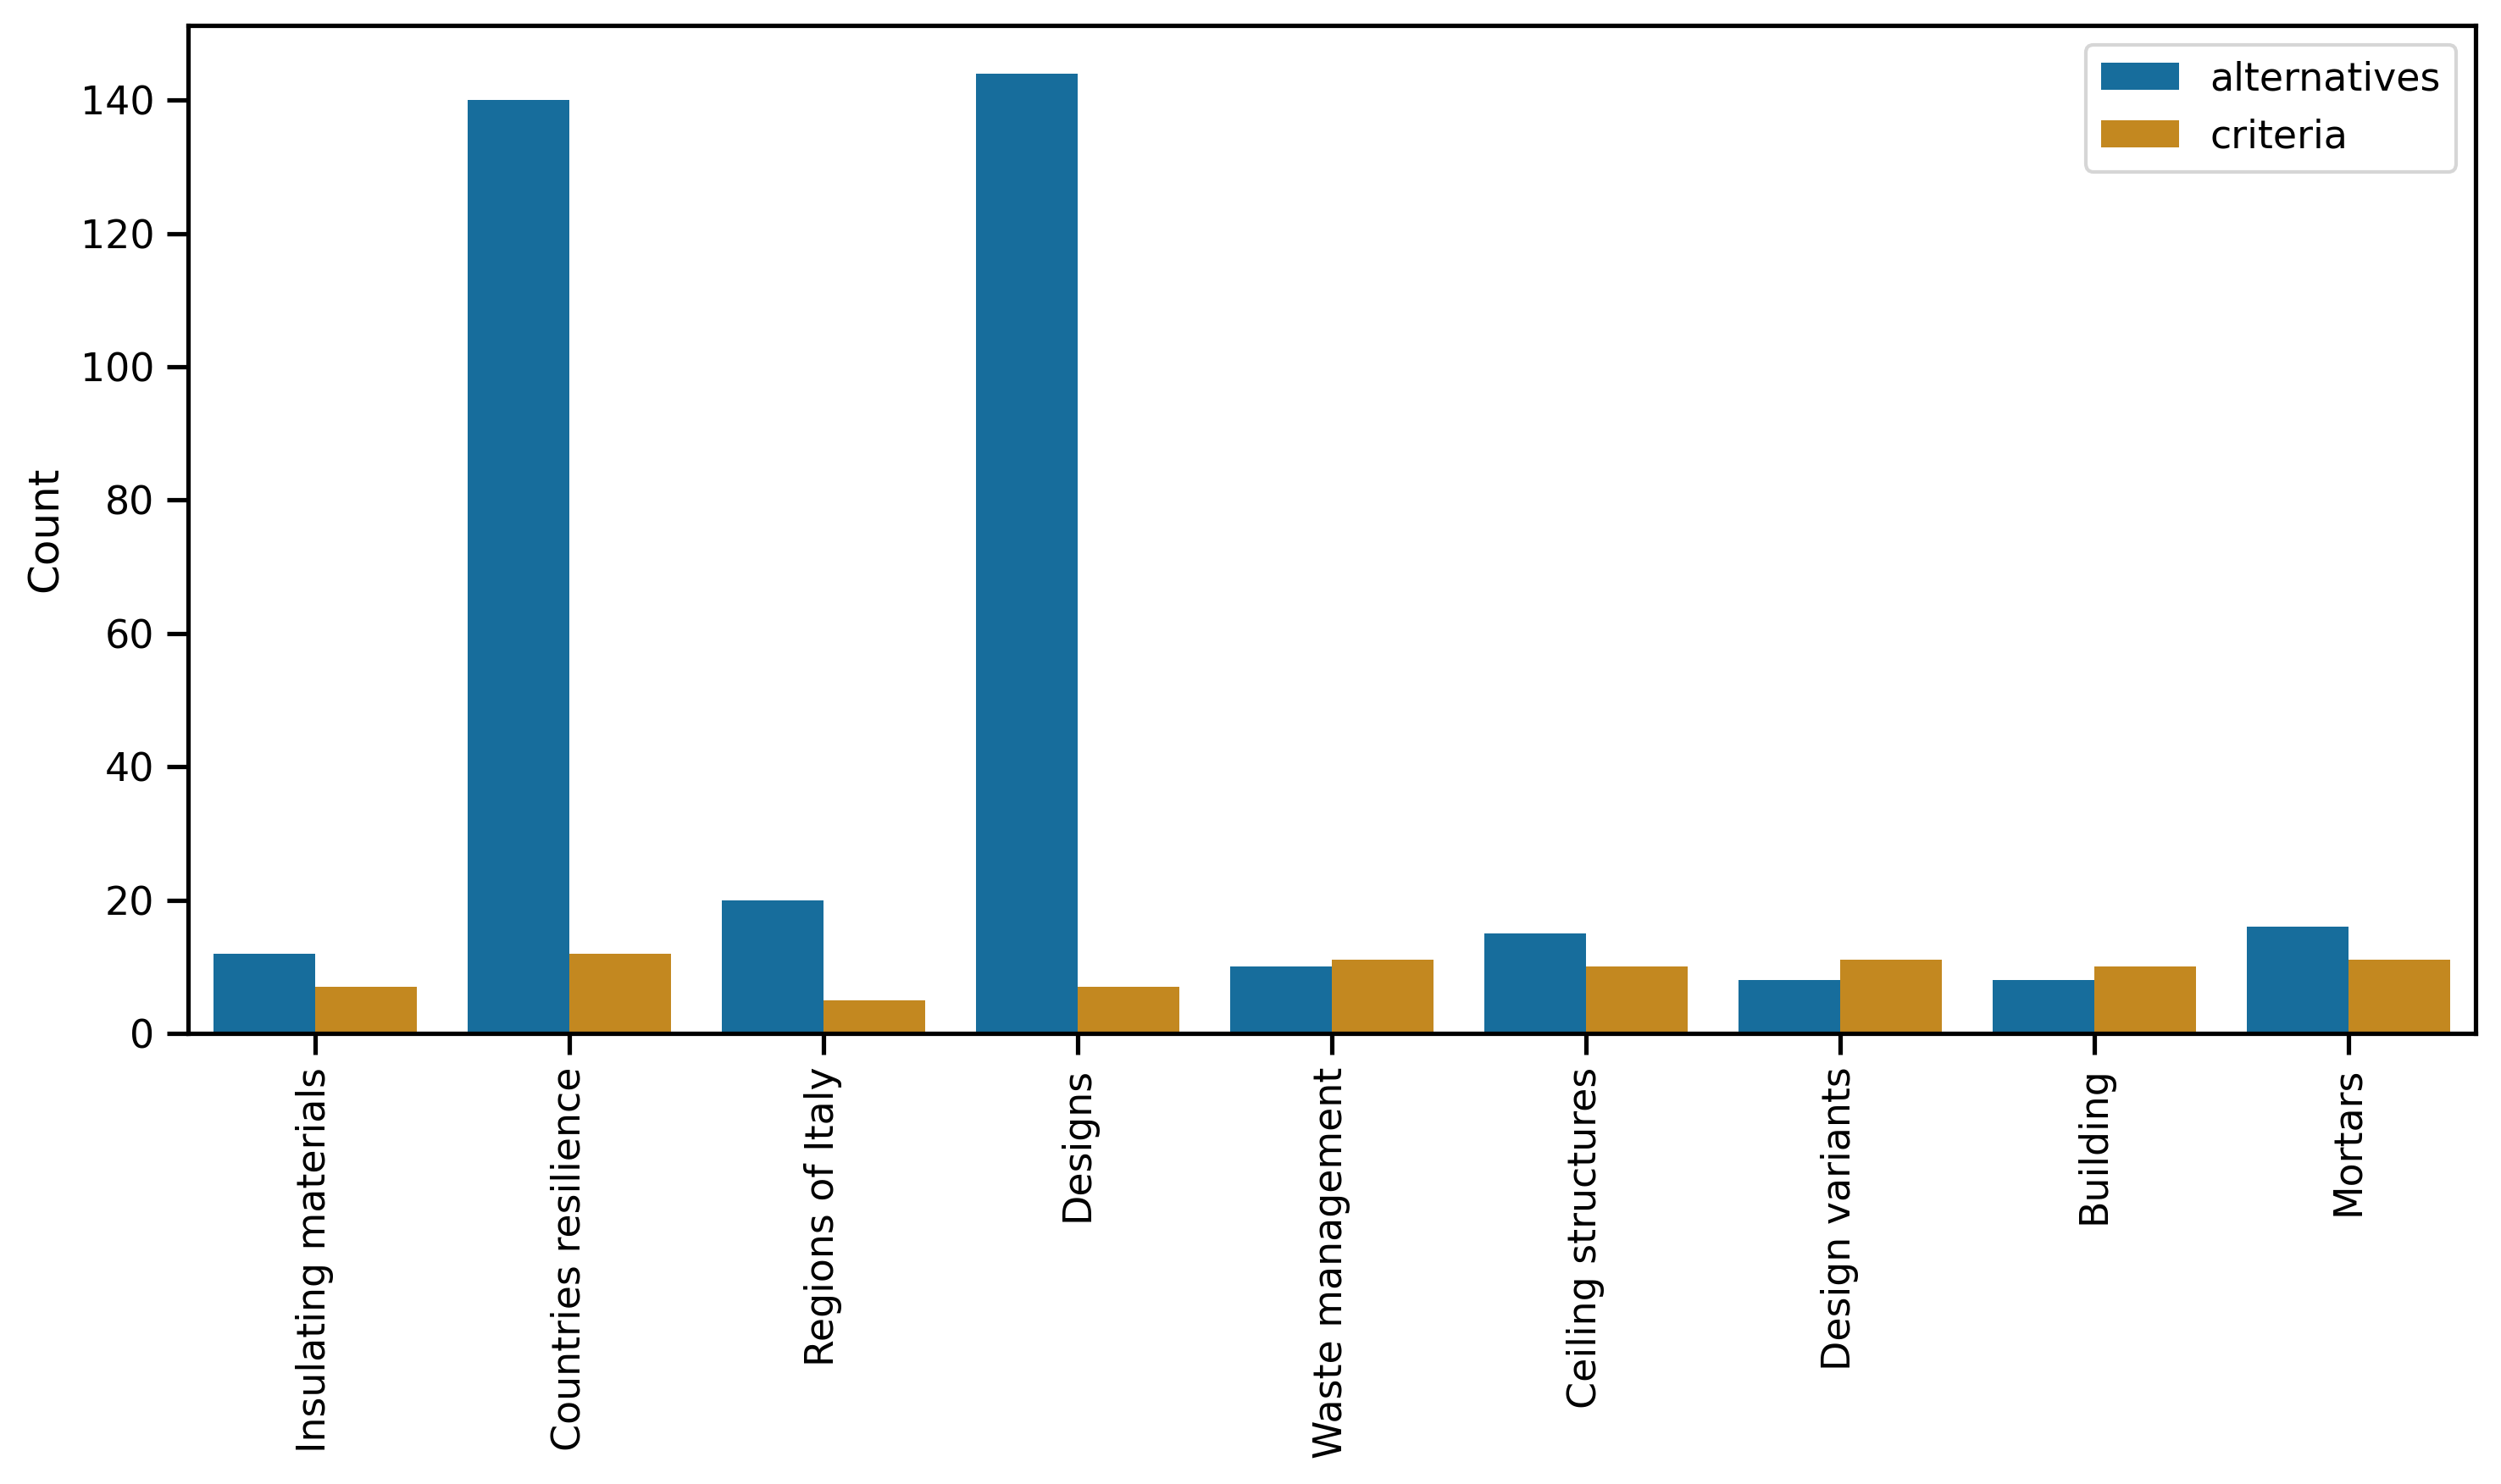

In [11]:
datasets = {
    "insulating-materials": "Insulating materials",
    "countries-resilience": "Countries resilience",
    "regions-italy": "Regions of Italy",
    "designs": "Designs",
    "waste-management": "Waste management",
    "ceiling-structures": "Ceiling structures",
    "design-variants": "Design variants",
    "building": "Building",
    "cement-mortars-geopolymers": "Mortars",
}

# Collect both alternatives and criteria data
data = defaultdict(list)
for folder, name in datasets.items():
    dataset = MCDADataset.read_csv(f"../data/{folder}/dataset.csv")
    data["name"].append(name)
    data["alternatives"].append(len(dataset.data))
    data["criteria"].append(len(dataset.data.columns))

df = pd.DataFrame(data)

# Melt the dataframe to have alternatives and criteria in one column
df_melted = df.melt(id_vars=['name'], 
                    value_vars=['alternatives', 'criteria'],
                    var_name='metric', 
                    value_name='count')

# Create the plot
plt.figure(figsize=(10, 6), dpi=300)
sns.set_context("notebook")
sns.barplot(data=df_melted, x="name", y="count", hue="metric", palette="colorblind")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig(f"../data/_miscellaneous/alternatives_criteria.png")
plt.show()

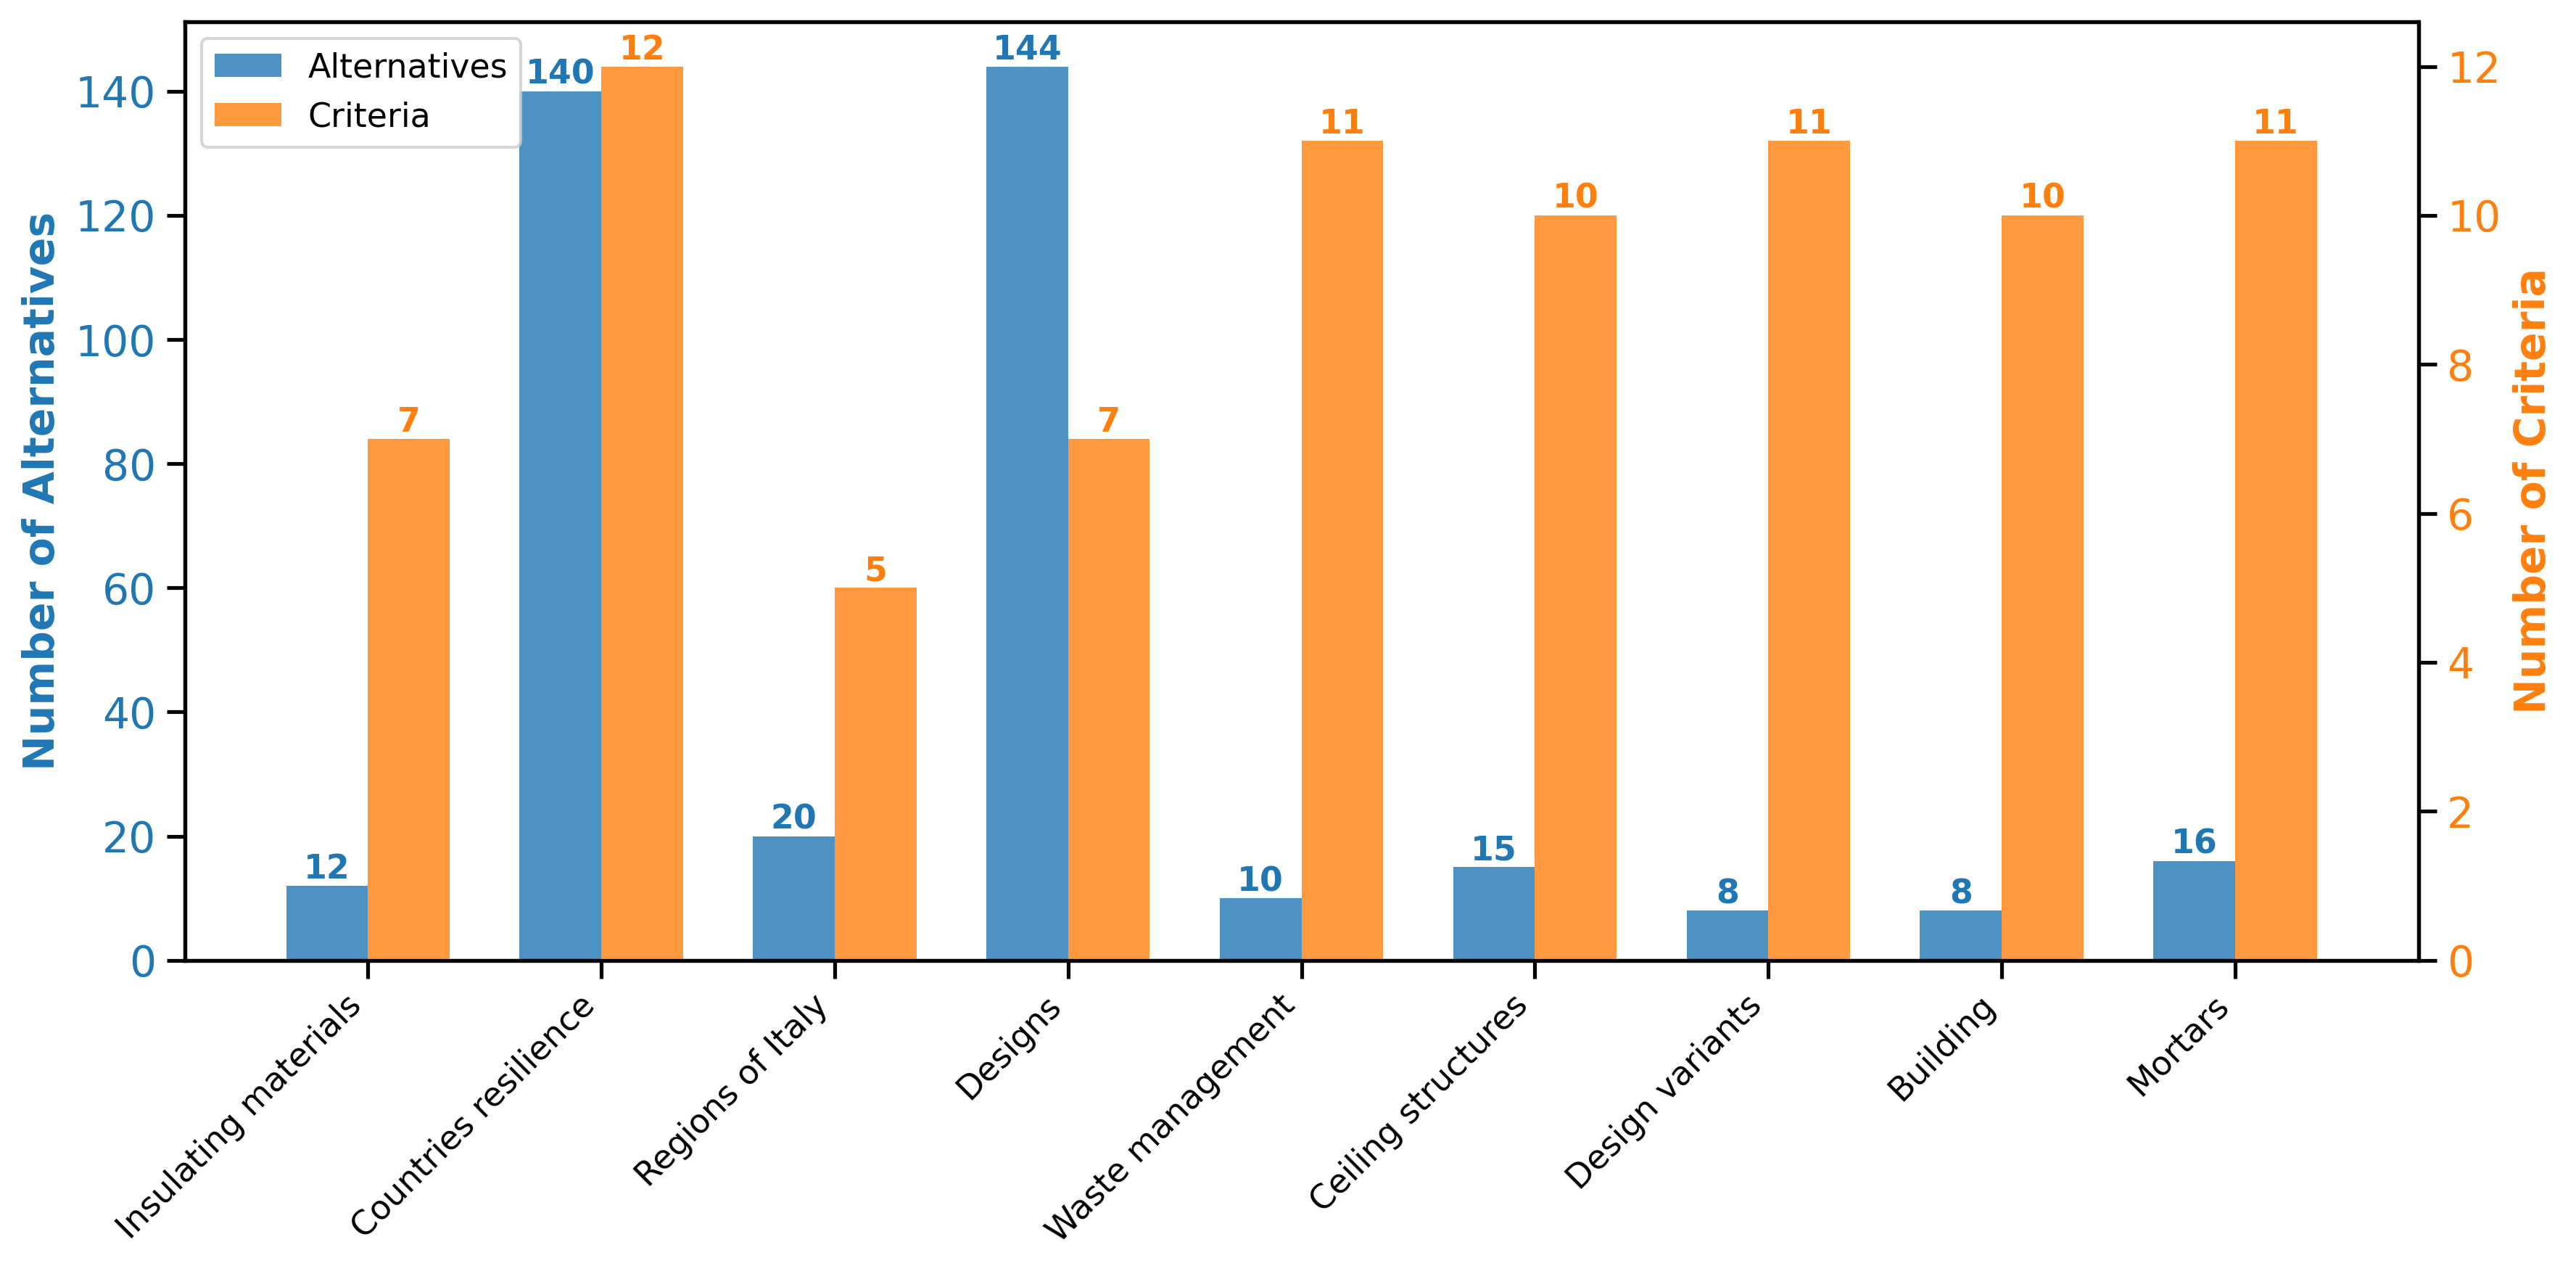

In [31]:
datasets = {
    "insulating-materials": "Insulating materials",
    "countries-resilience": "Countries resilience",
    "regions-italy": "Regions of Italy",
    "designs": "Designs",
    "waste-management": "Waste management",
    "ceiling-structures": "Ceiling structures",
    "design-variants": "Design variants",
    "building": "Building",
    "cement-mortars-geopolymers": "Mortars",
}

# Collect both alternatives and criteria data
data = defaultdict(list)
for folder, name in datasets.items():
    dataset = MCDADataset.read_csv(f"../data/{folder}/dataset.csv")
    data["name"].append(name)
    data["alternatives"].append(len(dataset.data))
    data["criteria"].append(len(dataset.data.columns))

df = pd.DataFrame(data)

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Set up positions for bars
x_pos = np.arange(len(df['name']))
width = 0.35

A_COLOR = '#1f77b4'
C_COLOR = '#ff7f0e'

# Plot alternatives on left y-axis (ax1)
bars1 = ax1.bar(x_pos - width/2, df['alternatives'], width, 
                label='Alternatives', color=A_COLOR, alpha=0.8)
ax1.set_ylabel('Number of Alternatives', color=A_COLOR, fontweight='bold', fontsize=14)
ax1.tick_params(axis='y', labelcolor=A_COLOR, labelsize=14)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(df['name'], rotation=45, ha='right')

# Create second y-axis for criteria
ax2 = ax1.twinx()
bars2 = ax2.bar(x_pos + width/2, df['criteria'], width, 
                label='Criteria', color=C_COLOR, alpha=0.8)
ax2.set_ylabel('Number of Criteria', color=C_COLOR, fontweight='bold', fontsize=14)
ax2.tick_params(axis='y', labelcolor=C_COLOR, labelsize=14)

# Add value labels on bars for clarity
for i, (alt, crit) in enumerate(zip(df['alternatives'], df['criteria'])):
    ax1.text(i - width/2, alt, str(alt), ha='center', va='bottom', 
             color=A_COLOR, fontweight='bold', fontsize=11)
    ax2.text(i + width/2, crit, str(crit), ha='center', va='bottom', 
             color=C_COLOR, fontweight='bold', fontsize=11)

# Add a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', 
           bbox_to_anchor=(0, 1))

plt.tight_layout()
plt.savefig(f"../data/_miscellaneous/alternatives_criteria_dual_axis.png", 
            bbox_inches='tight', dpi=300)
plt.show()